In [1]:
import pandas as pd
from signalai.config import CONFIG_DIR, PIPELINE_SAVE_PATH
from taskorganizer.pipeline import Pipeline
from signalai.signal_tools.signal import SignalDataset, Signal

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np

In [21]:
np.random.normal(loc=0.0, scale=np.random.uniform(0.,0.3), size=[1,16384]).astype(np.float32).dtype

dtype('float32')

In [2]:
config_path = CONFIG_DIR / "processing" / "pipeline.yaml"
params_config_path = CONFIG_DIR / "data_preparation" / "diamond_noise.yaml"
generator_config_path = CONFIG_DIR / "generators" / "diamond_noise.yaml"
pip = Pipeline(
    config_path,
    config_dir=CONFIG_DIR,
    save_folder=PIPELINE_SAVE_PATH,
    parameter_yamls=[params_config_path, generator_config_path]
)

In [3]:
df = pip.run("DatasetLoader")

In [4]:
gen = pip.run("data_generator")

track t0 initialized with datasets ["diamond_loc00", "diamond_loc01", "diamond_loc02", "diamond_loc03", "diamond_loc04", "diamond_loc05", "diamond_loc06", "diamond_loc07", "diamond_loc08", "diamond_loc09"]
track t1 initialized with datasets ["noise"]


In [5]:
X, Y = next(gen)

Sample taken from 0 to 100000, channel 0
Sample taken from 0 to 100000, channel 1
Sample taken from 0 to 100000, channel 2
Sample taken from 0 to 100000, channel 3
Sample taken from 163996684 to 164096684, channel 0
Sample taken from 163996684 to 164096684, channel 1
Sample taken from 163996684 to 164096684, channel 2
Sample taken from 163996684 to 164096684, channel 3


In [7]:
X

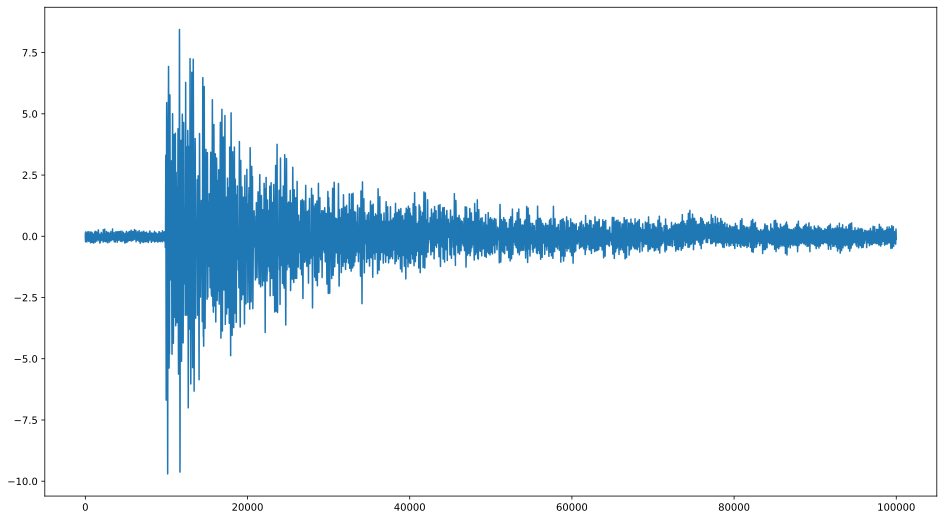

In [8]:
X.show(channels=0)

In [13]:
#s.play()

In [9]:
X.signal

array([[-0.04551084,  0.05302607,  0.02153614, ..., -0.09173597,
        -0.17579947, -0.08463019],
       [-0.09764074, -0.00173624,  0.22007737, ...,  0.27093735,
         0.2599993 , -0.04627512],
       [-0.11540015, -0.00073348, -0.16374557, ..., -0.0865401 ,
        -0.00604512, -0.04300311],
       [-0.33174676, -0.19142547, -0.33352166, ..., -0.17010775,
        -0.17365758, -0.23100615]], dtype=float32)

In [10]:
len(X)

100000

In [11]:
X.signal_map

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

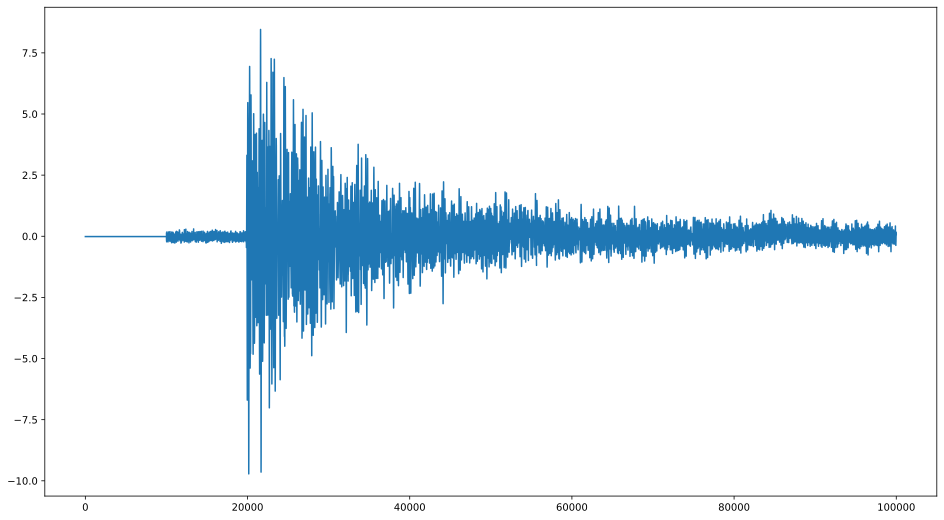

In [12]:
X.margin_interval(100000, 10000).show(channels=0)